In [1]:
from config import weather_key
from config import crime_key
import matplotlib.pyplot as plt
from scipy import stats
import requests
import datetime
import pandas as pd
from datetime import date

In [2]:
# Save config information.
# weather_url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "metric"
# crime_url = "https://services.arcgis.com/afSMGVsC7QlRK1kZ/arcgis/rest/services/NEIGHBORHOOD_CRIME_STATS/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json"
# Build partial query URL
# queryweather_url = f""
# querycrime_url = f"{crime_url}api_key={crime_key}"

In [3]:
# querycrime_url
# response['features'][0]

In [4]:
# response = requests.get(crime_url).json()
# crime_result = response['fields']
# crime_result

In [5]:
weather_df = pd.read_csv('../Resources/weather_data_long.csv')
crime_df =pd.read_csv('../Resources/NEIGHBORHOOD_CRIME_STATS.csv')
weather_2017 = weather_df[(weather_df['date'] >= '2017-01-01')]
weather_2017.to_csv("../Resources/weather_2017.csv", encoding="utf-8", index=False)

In [6]:
weather_df = pd.read_csv("../Resources/weather_2017.csv")
weather_df.columns

Index(['loc_id', 'date', 'maxtempC', 'maxtempF', 'mintempC', 'mintempF',
       'avgtempC', 'avgtempF', 'totalprecipMM', 'totalprecipIn',
       'windspeedMiles', 'windspeedKmph', 'sunhour', 'winddirdegree',
       'winddir16point', 'weatherCode', 'weatherIconUrl', 'weatherDesc',
       'humidity', 'visibilityKm', 'visibilityMiles', 'pressureMB',
       'pressureInches', 'cloudcover', 'HeatIndexC', 'HeatIndexF', 'DewPointC',
       'DewPointF', 'WindChillC', 'WindChillF', 'WindGustMiles',
       'WindGustKmph', 'FeelsLikeC', 'FeelsLikeF', 'uvIndex', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')

In [7]:
weather_df.dtypes

loc_id                 int64
date                  object
maxtempC               int64
maxtempF               int64
mintempC               int64
mintempF               int64
avgtempC               int64
avgtempF               int64
totalprecipMM        float64
totalprecipIn        float64
windspeedMiles         int64
windspeedKmph          int64
sunhour              float64
winddirdegree          int64
winddir16point        object
weatherCode            int64
weatherIconUrl        object
weatherDesc           object
humidity               int64
visibilityKm           int64
visibilityMiles        int64
pressureMB             int64
pressureInches         int64
cloudcover             int64
HeatIndexC             int64
HeatIndexF             int64
DewPointC              int64
DewPointF              int64
WindChillC             int64
WindChillF             int64
WindGustMiles          int64
WindGustKmph           int64
FeelsLikeC             int64
FeelsLikeF             int64
uvIndex       

In [8]:
weather_df['date'] = pd.to_datetime(weather_df['date'])

In [9]:
new_weather = weather_df[(weather_df['date'] >= '2017-08-31') & (weather_df['date'] <= '2021-03-31')]
new_weather

,loc_id,date,maxtempC,maxtempF,mintempC,mintempF,avgtempC,avgtempF,totalprecipMM,totalprecipIn,...,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
242,1,2017-08-31,24,76,13,56,19,66,0.0,0.00,...,14,19,65,5,06:34 AM,07:52 PM,04:23 PM,01:08 AM,First Quarter,41.4
243,1,2017-09-01,22,72,12,54,18,64,0.2,0.01,...,20,17,63,5,06:35 AM,07:50 PM,05:10 PM,01:55 AM,Waxing Gibbous,55.2
244,1,2017-09-02,26,79,16,61,21,69,3.6,0.14,...,21,21,69,6,06:36 AM,07:48 PM,05:53 PM,02:47 AM,Waxing Gibbous,62.1
245,1,2017-09-03,29,85,16,60,23,73,0.0,0.00,...,21,23,74,6,06:38 AM,07:46 PM,06:31 PM,03:44 AM,Waxing Gibbous,69.0
246,1,2017-09-04,23,73,15,59,19,66,0.4,0.02,...,23,19,66,5,06:39 AM,07:44 PM,07:07 PM,04:44 AM,Full Moon,75.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,1,2021-03-27,11,52,6,42,8,47,5.9,0.23,...,15,6,43,2,07:02 AM,07:35 PM,06:21 PM,06:56 AM,Waning Gibbous,96.6
1547,1,2021-03-28,7,45,2,36,4,39,4.7,0.19,...,32,-1,31,2,07:01 AM,07:37 PM,07:41 PM,07:22 AM,Waning Gibbous,89.7
1548,1,2021-03-29,19,66,4,39,11,51,0.0,0.00,...,34,9,47,4,06:59 AM,07:38 PM,09:01 PM,07:47 AM,Waning Gibbous,82.8
1549,1,2021-03-30,11,52,2,36,5,40,0.7,0.03,...,30,0,32,2,06:57 AM,07:39 PM,10:22 PM,08:12 AM,Waning Gibbous,75.9


In [10]:
weather_month= new_weather.groupby(pd.Grouper(key="date", freq="1M")).mean()

In [11]:
weather_month

,loc_id,maxtempC,maxtempF,mintempC,mintempF,avgtempC,avgtempF,totalprecipMM,totalprecipIn,windspeedMiles,...,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,uvIndex,moon_illumination
date,,,,,,,,,,,,,,,,,,,,,
2017-08-31,1.0,24.000000,76.000000,13.000000,56.000000,19.000000,66.000000,0.000000,0.000000,7.000000,...,10.000000,50.000000,19.000000,65.000000,9.000000,14.000000,19.000000,65.000000,5.000000,41.400000
2017-09-30,1.0,24.500000,75.900000,15.000000,58.866667,19.600000,67.166667,2.196667,0.086333,8.400000,...,12.366667,54.033333,19.266667,66.566667,11.633333,18.700000,19.633333,67.266667,5.133333,48.300000
2017-10-31,1.0,14.645161,58.193548,8.032258,46.354839,10.935484,51.935484,2.293871,0.089677,9.258065,...,3.580645,38.516129,9.387097,48.806452,12.935484,20.838710,9.387097,48.806452,3.322581,48.522581
2017-11-30,1.0,4.633333,40.266667,-1.833333,28.933333,1.133333,34.100000,0.370000,0.014667,8.266667,...,-5.200000,22.700000,-2.566667,27.400000,11.833333,19.033333,-2.566667,27.400000,1.800000,48.300000
2017-12-31,1.0,-4.967742,23.129032,-9.806452,14.419355,-7.322581,18.741935,0.519355,0.020000,7.354839,...,-10.322581,13.419355,-12.612903,9.225806,10.645161,17.258065,-12.612903,9.225806,1.483871,48.967742
2018-01-31,1.0,-6.000000,21.387097,-12.903226,9.129032,-9.451613,15.032258,1.196774,0.046774,7.580645,...,-11.064516,12.129032,-15.096774,4.806452,11.741935,18.903226,-15.096774,4.806452,1.580645,49.412903
2018-02-28,1.0,-6.178571,20.857143,-13.642857,7.535714,-9.714286,14.357143,0.871429,0.034286,7.142857,...,-11.321429,11.571429,-15.357143,4.250000,10.821429,17.428571,-15.357143,4.250000,1.428571,45.589286
2018-03-31,1.0,2.516129,36.322581,-4.129032,24.838710,-0.903226,30.354839,0.774194,0.029677,7.387097,...,-3.870968,25.032258,-4.580645,23.709677,10.870968,17.548387,-4.580645,23.709677,1.354839,49.635484
2018-04-30,1.0,7.133333,44.800000,-2.100000,28.166667,2.366667,36.366667,1.754333,0.068333,7.666667,...,-2.166667,28.166667,-0.633333,30.966667,11.033333,17.666667,-0.633333,30.966667,2.200000,48.300000


In [12]:
weather_month.dtypes

loc_id               float64
maxtempC             float64
maxtempF             float64
mintempC             float64
mintempF             float64
avgtempC             float64
avgtempF             float64
totalprecipMM        float64
totalprecipIn        float64
windspeedMiles       float64
windspeedKmph        float64
sunhour              float64
winddirdegree        float64
weatherCode          float64
humidity             float64
visibilityKm         float64
visibilityMiles      float64
pressureMB           float64
pressureInches       float64
cloudcover           float64
HeatIndexC           float64
HeatIndexF           float64
DewPointC            float64
DewPointF            float64
WindChillC           float64
WindChillF           float64
WindGustMiles        float64
WindGustKmph         float64
FeelsLikeC           float64
FeelsLikeF           float64
uvIndex              float64
moon_illumination    float64
dtype: object

In [13]:
crime_df['ucrDescription'].unique()

array(['Aggravated Assault', 'Arson', 'Auto Theft', 'Burglary',
       'Homicide', 'Larceny', 'Rape', 'Robbery'], dtype=object)

In [14]:
crime_df['Date'] = pd.to_datetime(crime_df.reportYear.astype(str) + '/' + crime_df.reportMonth.astype(str) + '/01')
crime_df.drop(labels=['reportMonth', 'reportYear'], axis=1, inplace=True)
crime_df = crime_df.dropna()
crime_df = crime_df[crime_df['number'] != 0]

In [15]:
crime_df.to_csv("../Resources/crime_date.csv", encoding="utf-8", index=False)

In [16]:
crime_df = pd.read_csv('../Resources/crime_date.csv')
crime_df

,neighborhoodCrimeStatisticsID,neighborhood,ucrDescription,number,Date
0,1,** NOT ASSIGNED **,Aggravated Assault,2.0,2017-08-01
1,3,** NOT ASSIGNED **,Auto Theft,3.0,2017-08-01
2,4,** NOT ASSIGNED **,Burglary,1.0,2017-08-01
3,6,** NOT ASSIGNED **,Larceny,8.0,2017-08-01
4,7,** NOT ASSIGNED **,Rape,2.0,2017-08-01
...,...,...,...,...,...
15342,30968,Windom Park,Robbery,1.0,2021-03-01
15343,30969,Z_** NOT ASSIGNED **,Aggravated Assault,2.0,2021-03-01
15344,30971,Z_** NOT ASSIGNED **,Auto Theft,2.0,2021-03-01
15345,30974,Z_** NOT ASSIGNED **,Larceny,8.0,2021-03-01


In [17]:
crime_df['Date'] = pd.to_datetime(crime_df['Date'])

In [18]:
assault_df = crime_df[(crime_df['ucrDescription'] == 'Aggravated Assault')]
homicide_df = crime_df[(crime_df['ucrDescription'] == 'Homicide')]
rape_df = crime_df[(crime_df['ucrDescription'] == 'Rape')]
robbery_df = crime_df[(crime_df['ucrDescription'] == 'Robbery')]

In [19]:
assault_month = assault_df.groupby(pd.Grouper(key="Date", freq="1M")).sum()
homicide_month = homicide_df.groupby(pd.Grouper(key="Date", freq="1M")).sum()
rape_month = rape_df.groupby(pd.Grouper(key="Date", freq="1M")).sum()
robbery_month = robbery_df.groupby(pd.Grouper(key="Date", freq="1M")).sum()

In [20]:
assault_month

,neighborhoodCrimeStatisticsID,number
Date,,
2017-08-31,20528,202.0
2017-09-30,50240,192.0
2017-10-31,83872,174.0
2017-11-30,122369,192.0
2017-12-31,142709,127.0
2018-01-31,171564,138.0
2018-02-28,166388,118.0
2018-03-31,247951,151.0
2018-04-30,258763,142.0


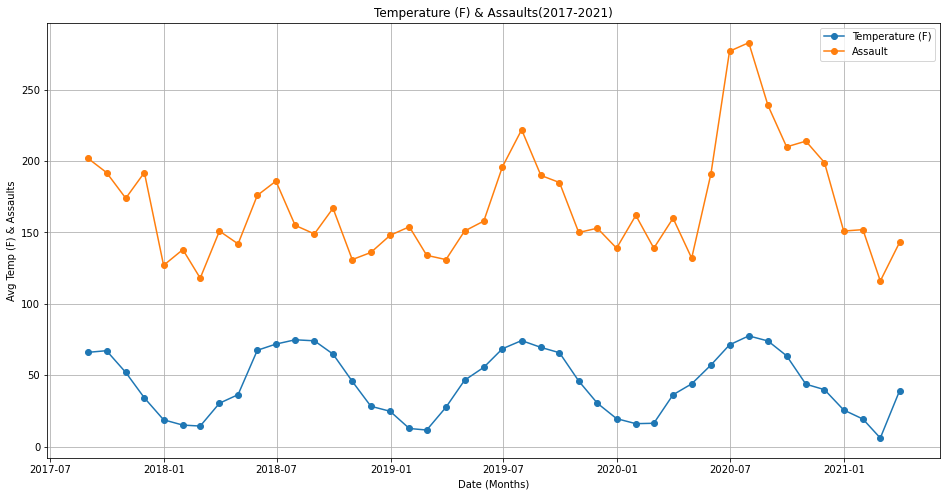

In [21]:
x_values = assault_month['number']
y_values = weather_month['avgtempF']
plt.figure(figsize=(16, 8))
plt.plot(y_values, marker='o', label='Temperature (F)')
plt.plot(x_values, marker='o', label='Assault')
plt.grid()
plt.xlabel('Date (Months)')
plt.ylabel('Avg Temp (F) & Assaults')
plt.title('Temperature (F) & Assaults(2017-2021)')
plt.legend()
plt.savefig('Temperature (F) & Assaults(2017-2021)')
plt.show()

The r-value is: 0.48266168480858423


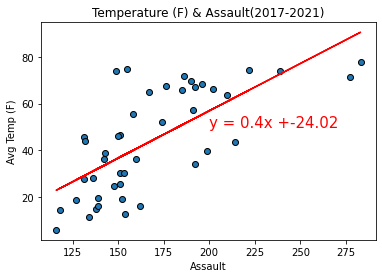

In [22]:
# Perform a linear regression on Temperature vs. Assault
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(200,50),fontsize=15,color="red")
plt.xlabel('Assault')
plt.ylabel('Avg Temp (F)')
plt.title('Temperature (F) & Assault(2017-2021)')
plt.savefig('line_reg for Temperature vs Assault')
print(f"The r-value is: {rvalue**2}")

In [23]:
homicide_month

,neighborhoodCrimeStatisticsID,number
Date,,
2017-08-31,900,4.0
2017-09-30,6630,6.0
2017-10-31,5199,3.0
2017-11-30,7767,3.0
2017-12-31,0,0.0
2018-01-31,11743,3.0
2018-02-28,9506,2.0
2018-03-31,10378,3.0
2018-04-30,12418,2.0


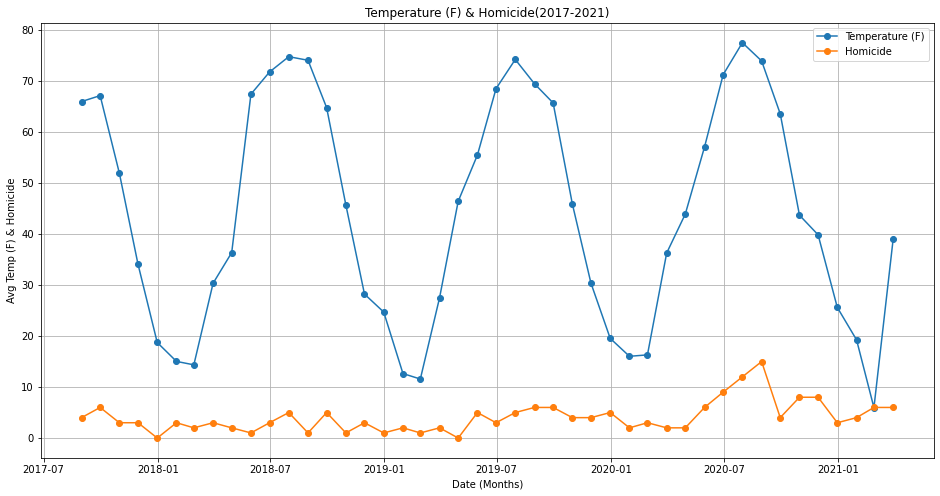

In [24]:
x_values = homicide_month['number']
y_values = weather_month['avgtempF']
plt.figure(figsize=(16, 8))
plt.plot(y_values, marker='o', label='Temperature (F)')
plt.plot(x_values, marker='o', label='Homicide')
plt.grid()
plt.xlabel('Date (Months)')
plt.ylabel('Avg Temp (F) & Homicide')
plt.title('Temperature (F) & Homicide(2017-2021)')
plt.legend()
plt.savefig('Temperature (F) & Homicide(2017-2021)')
plt.show()

The r-value is: 0.18877119385498928


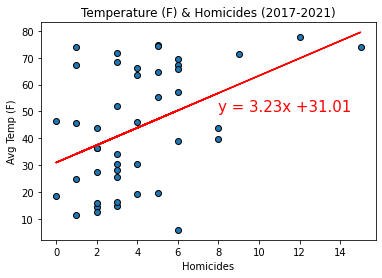

In [25]:
# Perform a linear regression on Temperature vs. Homicide
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(8,50),fontsize=15,color="red")
plt.xlabel('Homicides')
plt.ylabel('Avg Temp (F)')
plt.title('Temperature (F) & Homicides (2017-2021)')
plt.savefig('line_reg for Temperature vs Homicide')
print(f"The r-value is: {rvalue**2}")

In [26]:
rape_month

,neighborhoodCrimeStatisticsID,number
Date,,
2017-08-31,9135,39.0
2017-09-30,29149,40.0
2017-10-31,58575,53.0
2017-11-30,69468,38.0
2017-12-31,76368,36.0
2018-01-31,81635,30.0
2018-02-28,97243,33.0
2018-03-31,148780,39.0
2018-04-30,114173,34.0


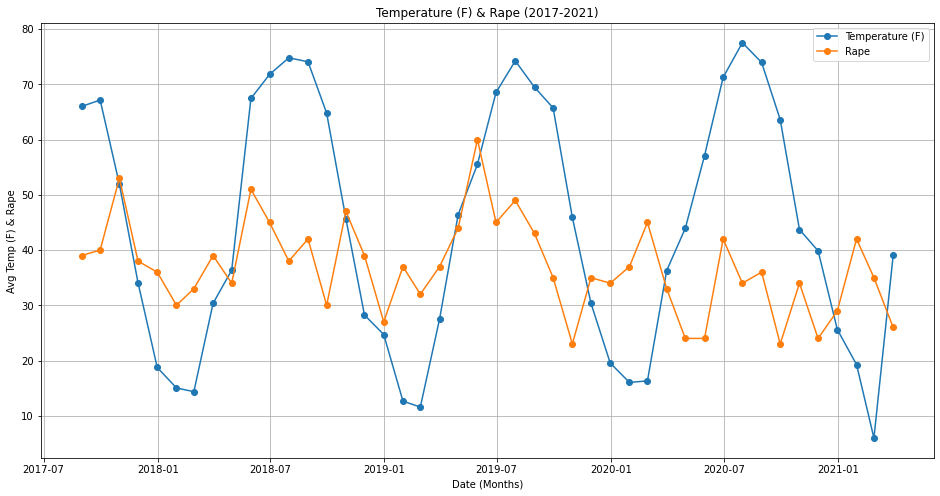

In [27]:
x_values = rape_month['number']
y_values = weather_month['avgtempF']
plt.figure(figsize=(16, 8))
plt.plot(y_values, marker='o', label='Temperature (F)')
plt.plot(x_values, marker='o', label='Rape')
plt.grid()
plt.xlabel('Date (Months)')
plt.ylabel('Avg Temp (F) & Rape')
plt.title('Temperature (F) & Rape (2017-2021)')
plt.legend()
plt.savefig('Temperature (F) & Rape (2017-2021)')
plt.show()

The r-value is: 0.0697678273094339


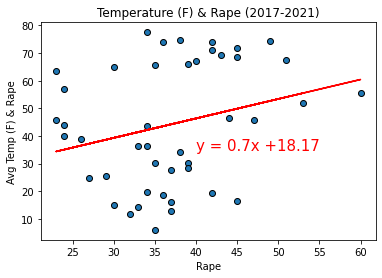

In [28]:
# Perform a linear regression on Temperature vs. Rape
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,35),fontsize=15,color="red")
plt.xlabel('Rape')
plt.ylabel('Avg Temp (F) & Rape')
plt.title('Temperature (F) & Rape (2017-2021)')
plt.savefig('line_reg for Temperature vs Rape')
print(f"The r-value is: {rvalue**2}")

In [29]:
robbery_month

,neighborhoodCrimeStatisticsID,number
Date,,
2017-08-31,16280,159.0
2017-09-30,49032,164.0
2017-10-31,80568,140.0
2017-11-30,125808,135.0
2017-12-31,131104,126.0
2018-01-31,171736,93.0
2018-02-28,178536,95.0
2018-03-31,206376,91.0
2018-04-30,234712,87.0


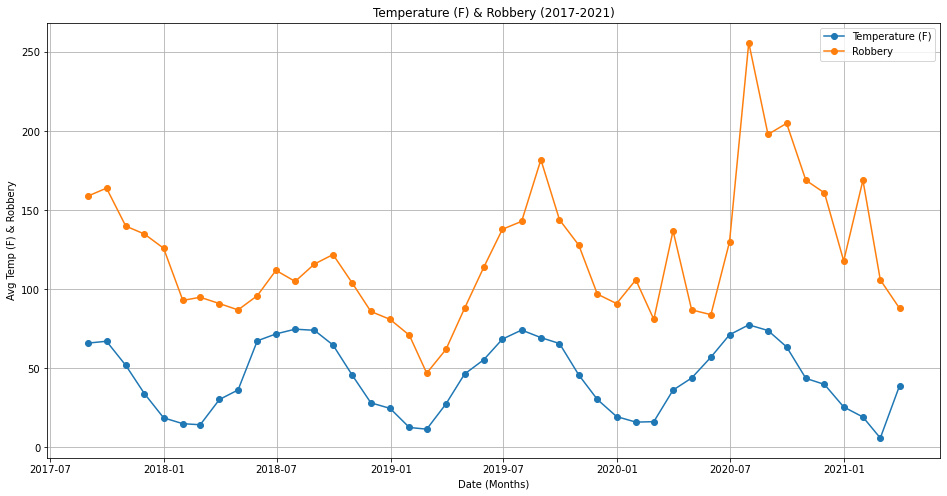

In [30]:
x_values = robbery_month['number']
y_values = weather_month['avgtempF']
plt.figure(figsize=(16, 8))
plt.plot(y_values, marker='o', label='Temperature (F)')
plt.plot(x_values, marker='o', label='Robbery')
plt.grid()
plt.xlabel('Date (Months)')
plt.ylabel('Avg Temp (F) & Robbery')
plt.title('Temperature (F) & Robbery (2017-2021)')
plt.legend()
plt.savefig('Temperature (F) & Robbery (2017-2021)')
plt.show()

The r-value is: 0.303787335245484


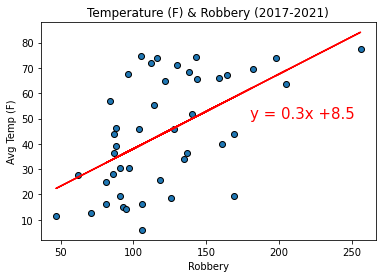

In [31]:
# Perform a linear regression on Temperature vs. Robbery
slope, intercept, rvalue, pvalue, stderr = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.scatter(x_values,y_values, edgecolor='black')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(180,50),fontsize=15,color="red")
plt.xlabel('Robbery')
plt.ylabel('Avg Temp (F)')
plt.title('Temperature (F) & Robbery (2017-2021)')
plt.savefig('line_reg for Temperature vs Robbery')
print(f"The r-value is: {rvalue**2}")